# Plot Multiple Average Accuracy Curves

This notebook is for plotting multiple average accuracy curves in the same figure. 

Please specify all the settings (the cells tagged "Please Specify") following the instructions and Hit "Run All". 

## 1. Specify Result Paths

Please specify the accuracy CSV files in the list. 

In [5]:
acc_paths = [
    "../outputs/til_pmnist_ewc_fi_hat/aggregated_results/acc_mean.csv",
    "../outputs/til_pmnist_layer_gradient_x_activation_hat/aggregated_results/acc_mean.csv",
]

## 2. Plot Figure

Please specify the path for saving the figure.

In [6]:
ave_acc_plot_path = "../outputs/ave_acc_plot.png"

Please specify the figure settings below.

In [7]:
# legends, same order as acc_paths
curve_labels = [
    "EWC Fisher Info",
    "Layer Gradient x Activation",
    ]

# axis labels
x_label = "After training task $t$"
y_label = "Average Accuracy (AA)"

# ticks (xticks is set as the number of tasks)
yticks = [i * 0.05 for i in range(21)]

# figure size
figsize = (16, 9)

# font size
fontsize = 16

# linewidth
linewidth = 2

# marker
marker = 'o'

# grid
grid = True


Plot the curves in the same figure.

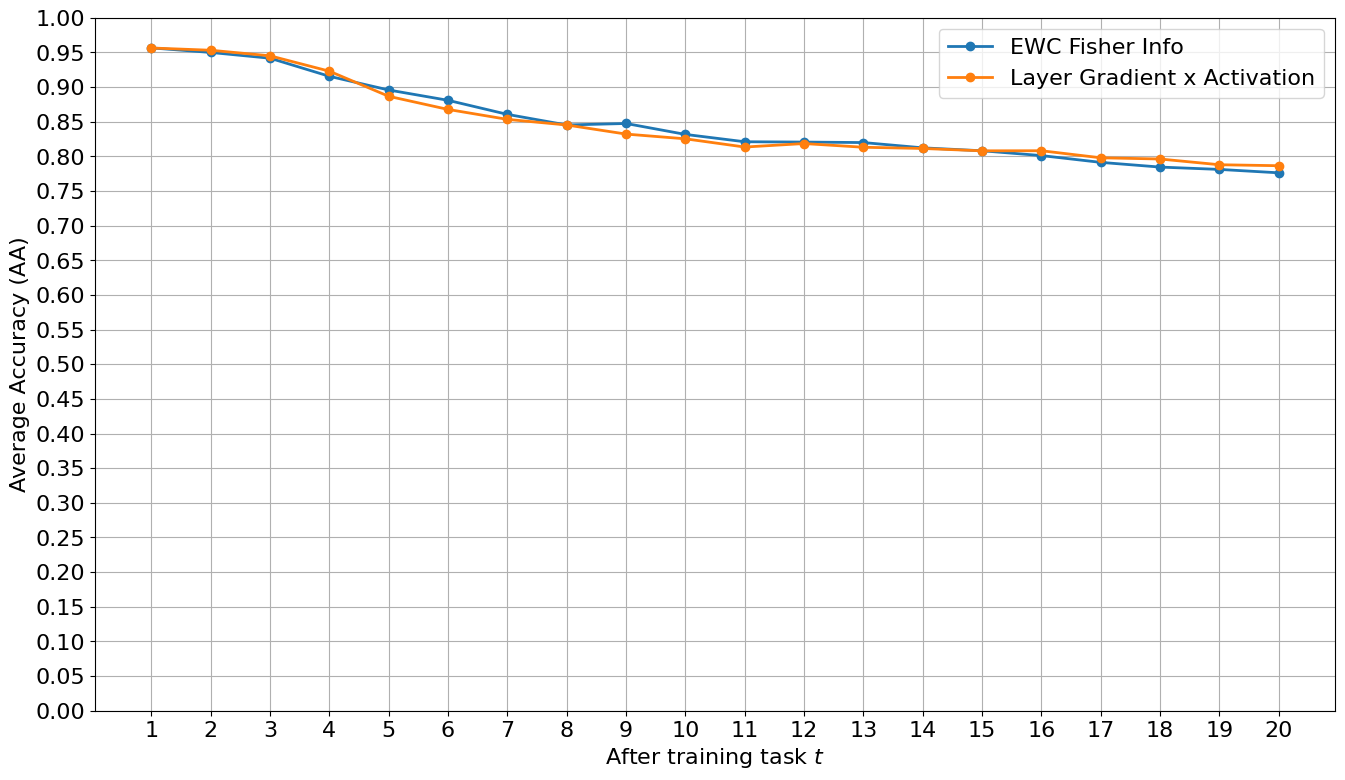

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=figsize)

for idx, file in enumerate(acc_paths):
    data = pd.read_csv(file)
    task_id = len(data)

    ax.plot(
        data["after_training_task"],
        data["average_accuracy"],
        marker=marker,
        linewidth=linewidth,
        label=curve_labels[idx],
    )

ax.set_xlabel(x_label, fontsize=fontsize)
ax.set_ylabel(y_label, fontsize=fontsize)
ax.grid(grid)

xticks = [int(i) for i in range(1, task_id + 1)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, fontsize=fontsize)
ax.set_yticklabels([f"{tick:.2f}" for tick in yticks], fontsize=fontsize)

ax.legend(fontsize=fontsize)

fig.savefig(ave_acc_plot_path)

plt.show()